In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings; warnings.simplefilter('ignore')

In [66]:
datasets_path = '/home/monodeepdas112/container-vrts/AppliedAICourse/Datasets/'
dataset = 'iris.csv'
iris = pd.read_csv(datasets_path+dataset)

In [67]:
#Shape of the dataset
print(iris.shape)

(150, 5)


In [68]:
#Display all the columns in the dataset
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [69]:
#Displaying how many data points of each class is present
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

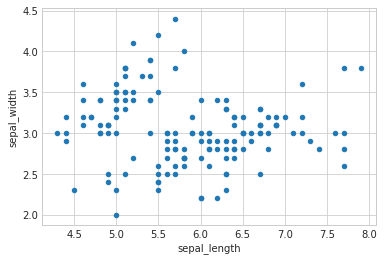

In [70]:
#2-D scatter plot
#ALWAYS understand the axis: label and scale
iris.plot(kind='scatter', x='sepal_length', y='sepal_width');
plt.show()

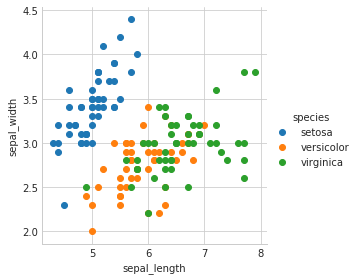

In [71]:
#2-D scatter plot with colors for different classes
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue='species', size=4).map(plt.scatter, 'sepal_length', 'sepal_width')\
    .add_legend();
plt.show()

Observation
    Using sepal length and width we can easily ditinguish setosa with other species

<h4>Pair Plots</h4>

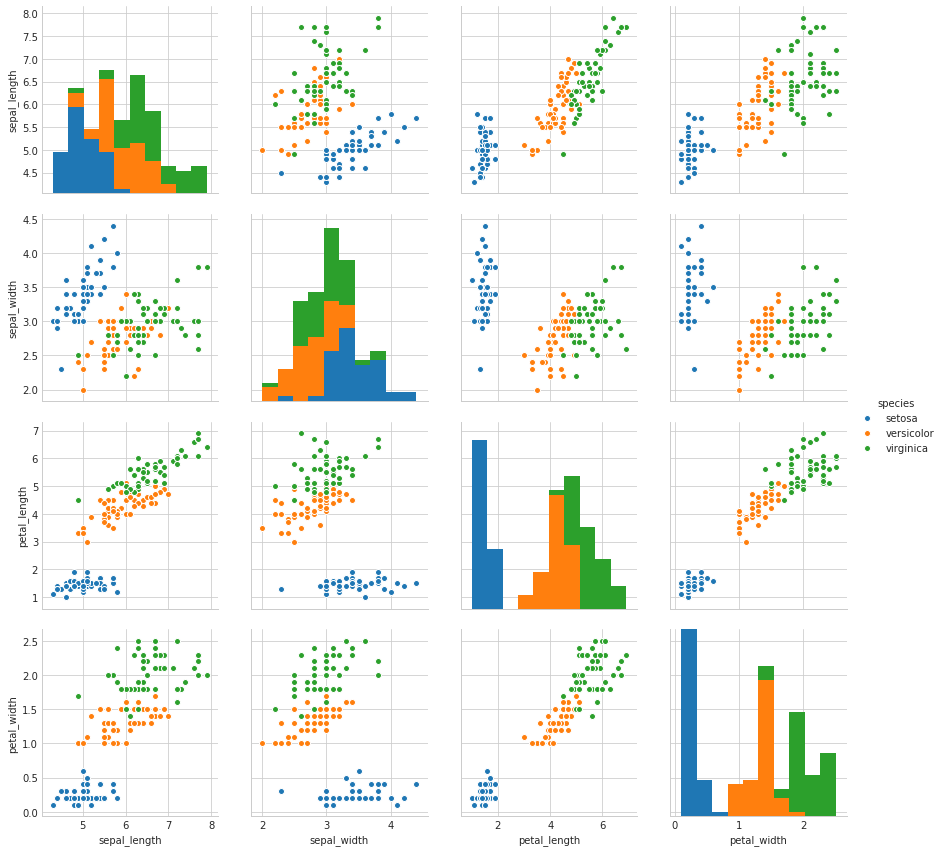

In [72]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris, hue='species', size=3)
plt.show()

Petal Length and Petal Width are the most significant features which can easily seperate all kinds of flowers

## Histogram, Density Plot

### Univariate Analysis with Petal Length

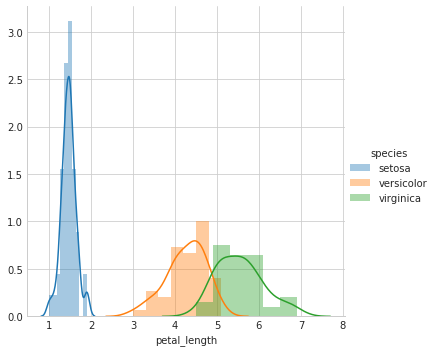

In [73]:
sns.FacetGrid(iris, hue='species', size=5)\
    .map(sns.distplot, 'petal_length')\
    .add_legend()
plt.show()

### Univariate Analysis with Petal Width

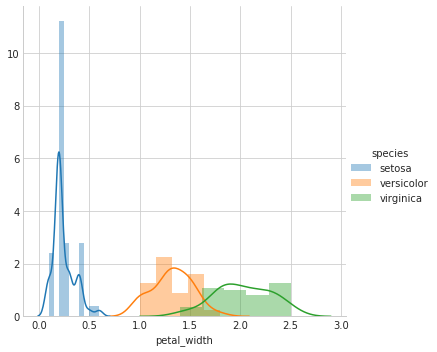

In [74]:
sns.FacetGrid(iris, hue='species', size=5)\
    .map(sns.distplot, 'petal_width')\
    .add_legend()
plt.show()

### Univariate Analysis using Sepal Length

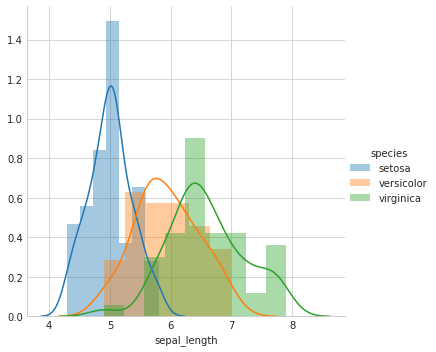

In [75]:
sns.FacetGrid(iris, hue='species', size=5)\
    .map(sns.distplot, 'sepal_length')\
    .add_legend()
plt.show()

### Univariate Analysis using Sepal Width

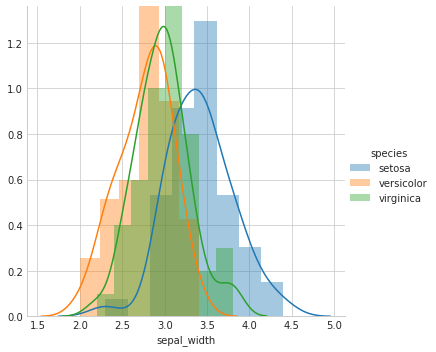

In [76]:
sns.FacetGrid(iris, hue='species', size=5)\
    .map(sns.distplot, 'sepal_width')\
    .add_legend()
plt.show()

## Cumulative Distribution Function

In [77]:
# consider you have an array like this
a= [1, 2, 3, 5, 10,11, 12, 13, 14, 15, 21,23, 25, 26, 27, 29, 30,31, 35, 51]
# here we have decided to group all these numbers into 5 bins
# i.e bins = 5
# the minimum number in the array is 1
# the maximum number in the array is 51
# the width of each bin is calculated as = ((max - min) / bins)
# width of each bin = (51-1)/5 = 10
# Since we got each bin with as 10, we can choose the bin edges like this
# 1 ...... 11 ....... 21 ........ 31 ....... 41 ....... 51
# |---10---|----10----|----10-----|----10----|----10----|
# so we have found out the bin edges now
# to find thte counts we calcuate how many number of points fall into each bin
# therefore the count of a bin = number of elements of a such that left_bin_egde<=ai 5 [1,2,3,5,10]
# ii. number of elements belongs to the 2nd bin 11<=x<21 => 5 [11,12,13,14,15]
# iii. number of elements belongs to the 3rd bin 21<=x<31 => 7 [21,23,25,26,27,29,30]
# iii. number of elements belongs to the 3rd bin 21<=x<31 => 7 [21,23,25,26,27,29,30]
# iv. number of elements belongs to the 4th bin 31<=x<41 => 2 [31,35]
# v. number of elements belongs to the 5th bin 41<=x<=51 => 1 [51]

# note: from the documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
# All but the last (righthand-most) bin is half-open i.e [1,2,3,4], the bins are [1,2), [2,3), [3,4]

# [1,10) = 1,2,3,4,5,6,7,8,9 means includig 1 and but not 10. its half open bracket

print('='*30, "explaining 'bin edges and counts",'='*30)
counts,bins = np.histogram(a, bins=5)

print("bin edges :",bins)
print("counts per each bin :",counts)

# density: bool, optional
# If False, the result will contain the number of samples in each bin. 
# If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. 
# Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen;
# it is not a probability mass function.

# and from the source code
#if density:
#        db = np.array(np.diff(bin_edges), float)
#        return n/db/n.sum(), bin_edges

# here the n => number of elements for each bin
n = counts
# and db = difference between bin edges
db = np.array(np.diff(bins))
# n.sum() number of all the elemnts 


print('='*30, "explaining 'density=True' parameter",'='*30)
print("manual calculated densities for each bin",counts/db/counts.sum())

counts, bins = np.histogram(a, bins=5, density=True)

print("bin edges :",bins)
print("counts per each bin using density=True:",counts)

print('='*30, "explaining counts/sum(counts)",'='*30)
# pleasen note that the documentation says when you have density=True, 
# "that the sum of the histogram values will not be equal to 1"

# this is simple logic we used, to make the whole sum=1, we have divided each element by the number of whole elements

counts, bins = np.histogram(a, bins=5, density=True)

print("bin edges :",bins)
# sum(counts) = summ of all the elements in the counts array = [0.025 + 0.025 + 0.035 + 0.01 + 0.005] = 0.1
# counts/sum(counts) = devide every element of counts=[0.025/0.1, 0.025/0.1, 0.035/0.1, 0.01/0.1, 0.005/0.1] = [0.25 0.25 0.35 0.1  0.05]
print("counts per each bin using density=True:",counts/sum(counts))

============================== explaining 'bin edges and counts ==============================
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin : [5 5 7 2 1]
============================== explaining 'density=True' parameter ==============================
manual calculated densities for each bin [0.025 0.025 0.035 0.01  0.005]
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.025 0.025 0.035 0.01  0.005]
============================== explaining counts/sum(counts) ==============================
bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.25 0.25 0.35 0.1  0.05]


## Median

In [78]:
print('\nMedians')
print(np.median(iris['petal_length']))


Medians
4.35


### Percentiles and Quantiles

In [79]:
print('Quantiles')
print(np.percentile(iris['petal_length'],90))

Quantiles
5.8


In [80]:
from statsmodels import robust
print('Median Absolute Deviation')
print(robust.mad(iris['petal_length']))
print(robust.mad(iris['sepal_length']))
print(robust.mad(iris['petal_width']))
print(robust.mad(iris['sepal_width']))

Median Absolute Deviation
1.8532527731320025
1.0378215529539216
1.0378215529539212
0.3706505546264005


### Boxplot with Whiskers

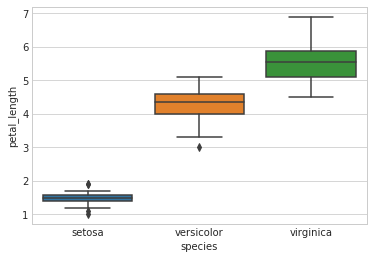

In [81]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

### Violin Plots

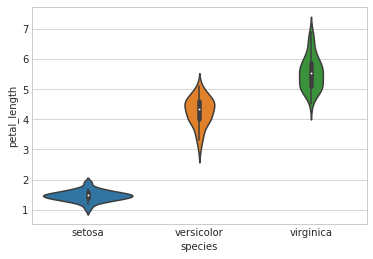

In [82]:
#Denser regions are darther and sparser regions are thinner
sns.violinplot(x='species', y='petal_length', size=10, data=iris)
plt.show()

## Multivariate probablity density and contour plot

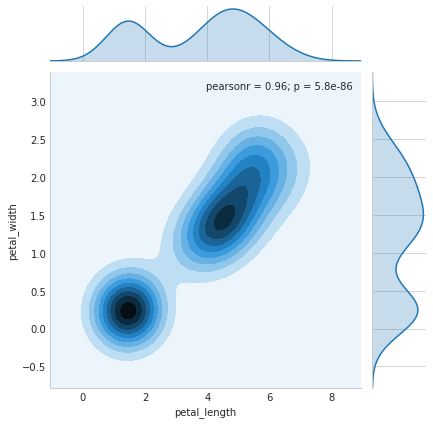

In [83]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kde')